# INX_Future_Inc_Employee_Performance_CDS_Project


##  Problem Statement:
#### INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. Recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management.CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing employees as this would affect the employee morale of all the employees in general and may further reduce the performance.

###  The following insights are expected from this project:

#### 1.Department wise performances
#### 2.Top 3 Important Factors effecting employee performance
#### 3.A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
#### 4.Recommendations to improve the employee performance based on insights from analysis.

# Import Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
data=pd.read_csv("CDS_Project2_Data_V1.8.csv")

In [3]:
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

# Basic checks

In [4]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [5]:
data.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [6]:
data.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

There is no missing value in the dataset.

# Domain Analysis


# Data Understanding

The data for training the model was collected from the company INX Future Inc. The data collected included 1200 employee’s performance appraisal records, described by 28 parameters. the parameters show the different attributes of an employee based on which the prediction is to be made.

Features present in the dataset
1-EmpNumber
2-Age
3-Gender
4-EducationBackground
5-MaritalStatus
6-EmpDepartment
7-EmpJobRole
8-BusinessTravelFrequency
9-DistanceFromHome
10-EmpEducationLevel
11-EmpEnvironmentSatisfaction
12-EmpHourlyRate
13-EmpJobInvolvement
14-EmpJobLevel
15-EmpJobSatisfaction
16-NumCompaniesWorked
17-OverTime
18-EmpLastSalaryHikePercent
19-EmpRelationshipSatisfaction
20-TotalWorkExperienceInYears
21-TrainingTimesLastYear
22-EmpWorkLifeBalance
23-ExperienceYearsAtThisCompany
24-ExperienceYearsInCurrentRole
25-YearsSinceLastPromotion
26-YearsWithCurrManager
27-Attrition
28-PerformanceRating

# Exploratory Data Analysis

# Step 1 - Univariate Analysis

In [8]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

<Axes: xlabel='DistanceFromHome', ylabel='count'>

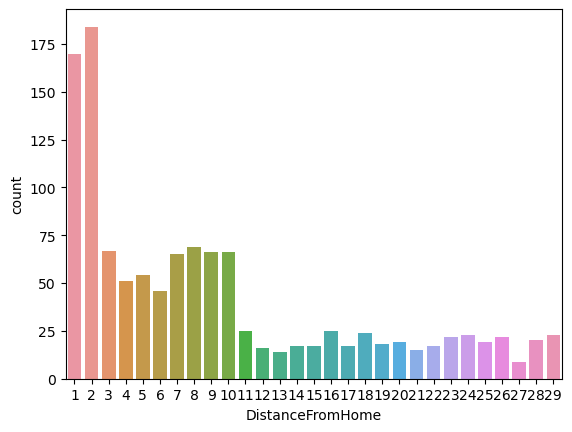

In [9]:
# Analyzing DistanceFromHome
sns.countplot(x='DistanceFromHome',data=data)

<Axes: xlabel='TotalWorkExperienceInYears', ylabel='Count'>

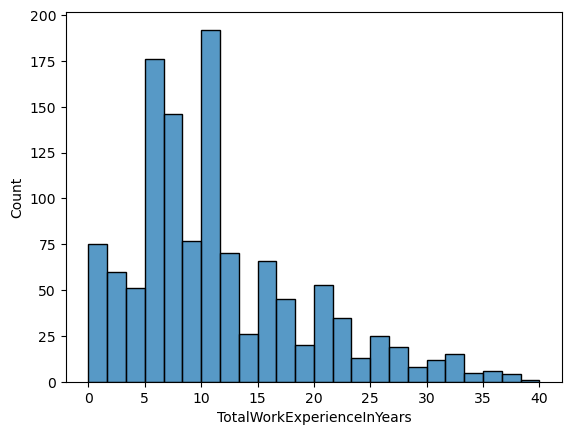

In [10]:
# Analyzing TotalWorkExperienceInYears
sns.histplot(x='TotalWorkExperienceInYears',data=data)

<Axes: xlabel='PerformanceRating', ylabel='count'>

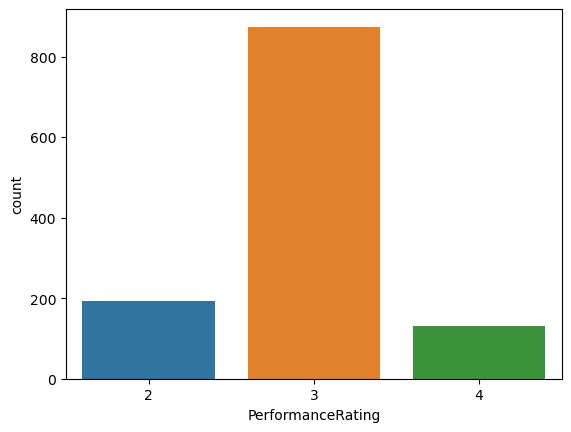

In [11]:
# Analyzing PerformanceRating
sns.countplot(x='PerformanceRating',data=data)

<Axes: xlabel='YearsWithCurrManager', ylabel='Count'>

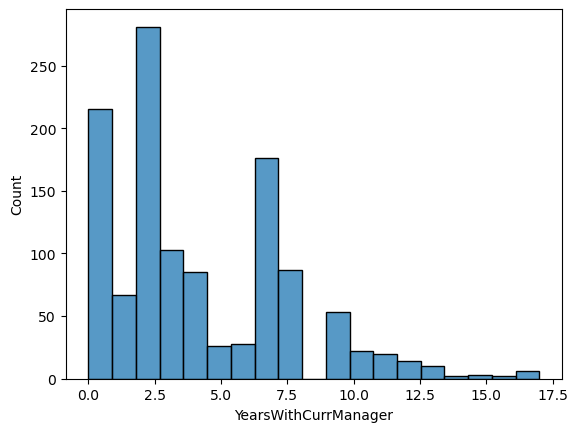

In [12]:
# Analyzing YearsWithCurrManager
sns.histplot(x='YearsWithCurrManager',data=data)

<Axes: xlabel='ExperienceYearsAtThisCompany', ylabel='count'>

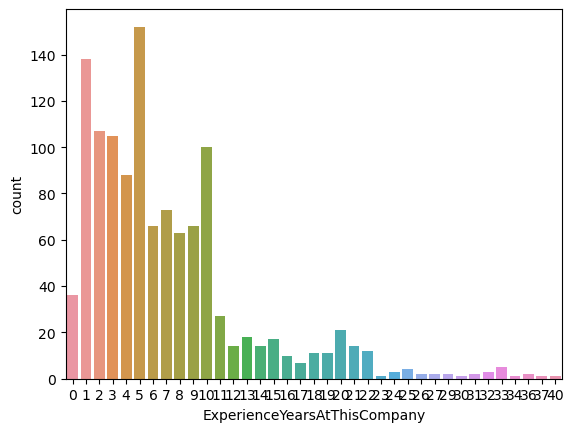

In [13]:
# Analyzing ExperienceYearsAtThisCompany
sns.countplot(x='ExperienceYearsAtThisCompany',data=data)

# Key Insights:

The average age of employees appears to be around mid to late 30s.
Most employees seem to have a moderate level of education, with a majority having an education level of 3.
The dataset includes various categorical variables such as gender, marital status, department, and job role, which can be analyzed to understand patterns and correlations.
It seems that attrition (Attrition) is present in the dataset, indicating whether an employee has left the company or not.

# Step 2 - Bivariate Analysis

# Bivariate Analysis refers to plots between input variables and target variable

<Axes: xlabel='DistanceFromHome', ylabel='count'>

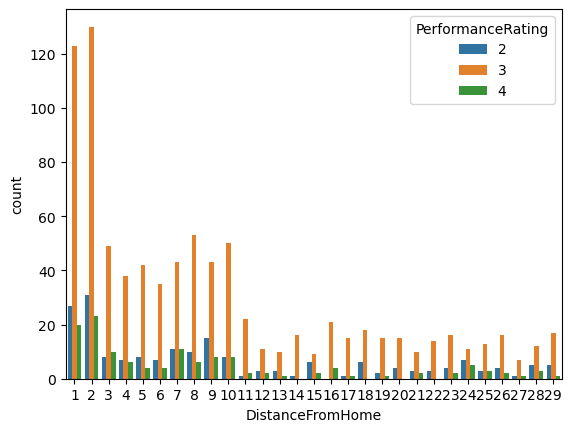

In [14]:
# Analyze relationship between DistanceFromHome and PerformanceRating
sns.countplot(x='DistanceFromHome',hue='PerformanceRating',data=data)

<Axes: xlabel='TrainingTimesLastYear', ylabel='Count'>

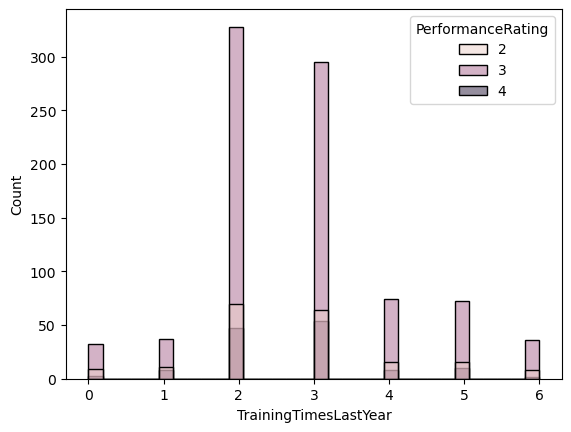

In [15]:
# Analyze relationship between TrainingTimesLastYear and PerformanceRating
sns.histplot(x='TrainingTimesLastYear',hue='PerformanceRating',data=data)

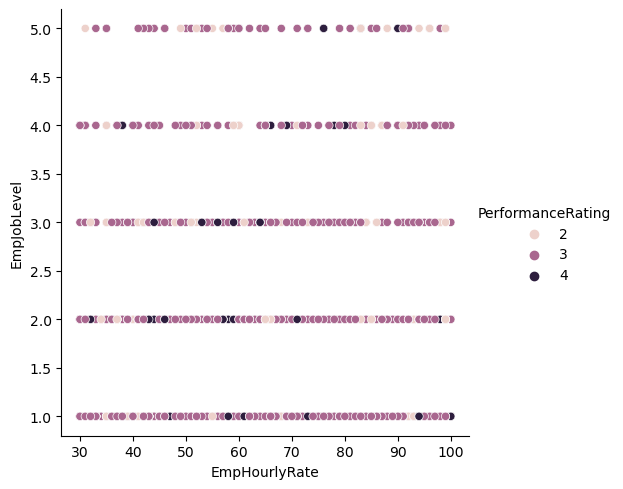

In [16]:
# Analyze EmpHourlyRate with EmpJobLevel
sns.relplot(x='EmpHourlyRate',y='EmpJobLevel',hue='PerformanceRating',data=data)

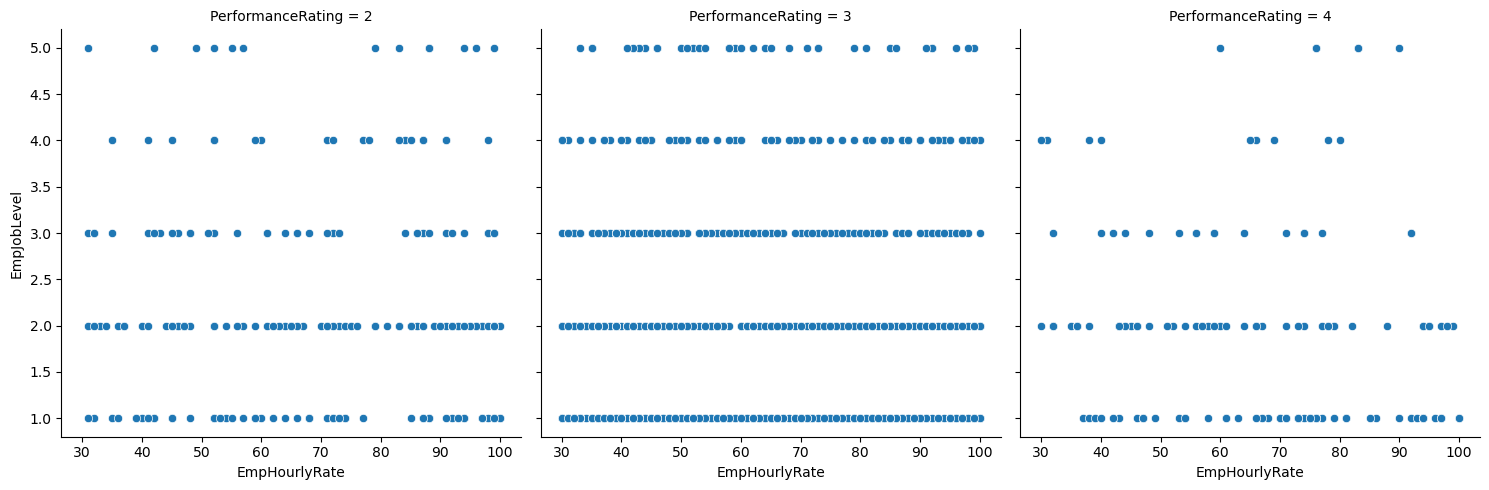

In [17]:
# Analyze EmpHourlyRate with EmpJobLevel
sns.relplot(x='EmpHourlyRate',y='EmpJobLevel',col='PerformanceRating',data=data)

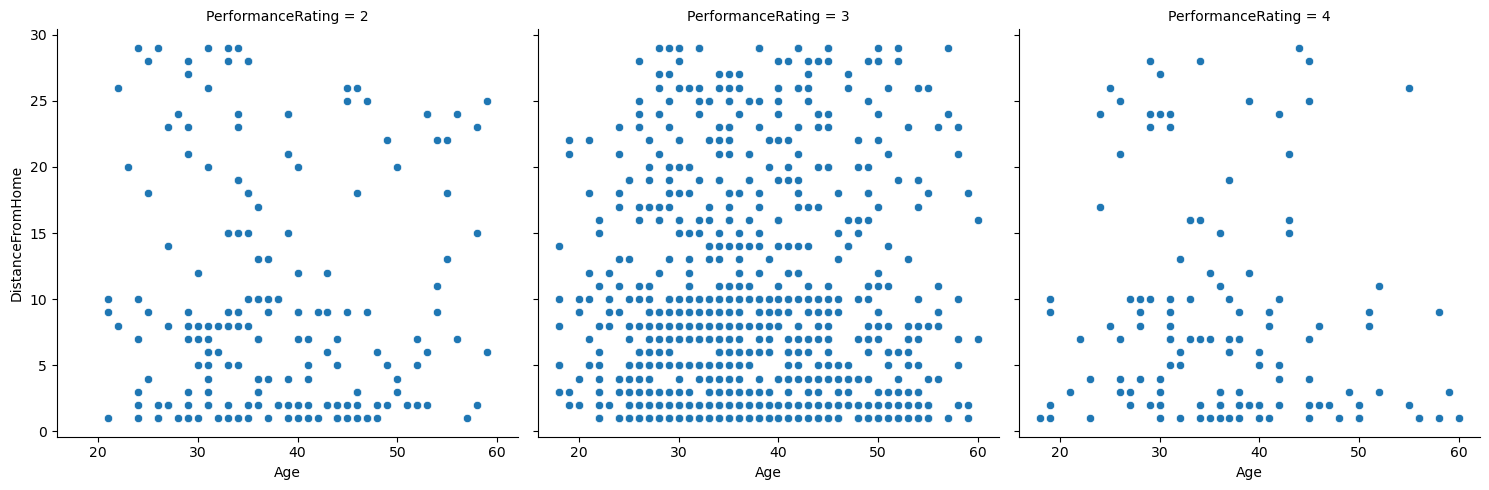

In [18]:
# Analyze Age with DistanceFromHome
sns.relplot(x='Age',y='DistanceFromHome',col='PerformanceRating',data=data)

<Axes: xlabel='EmpJobSatisfaction', ylabel='Count'>

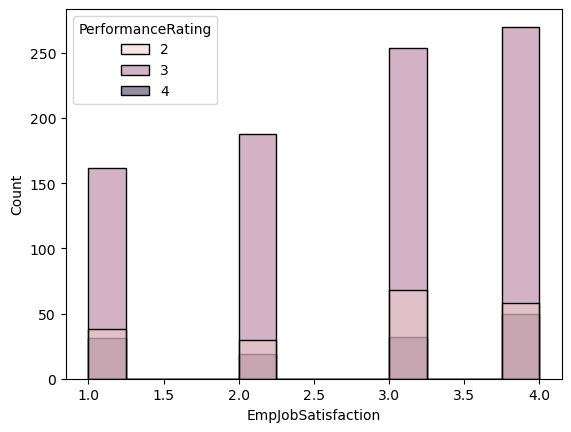

In [19]:
# Analyze relationship betwwen EmpJobSatisfaction and PerformanceRating
sns.histplot(x='EmpJobSatisfaction',hue='PerformanceRating',data=data)

# Step 3 - Multivariate Analysis

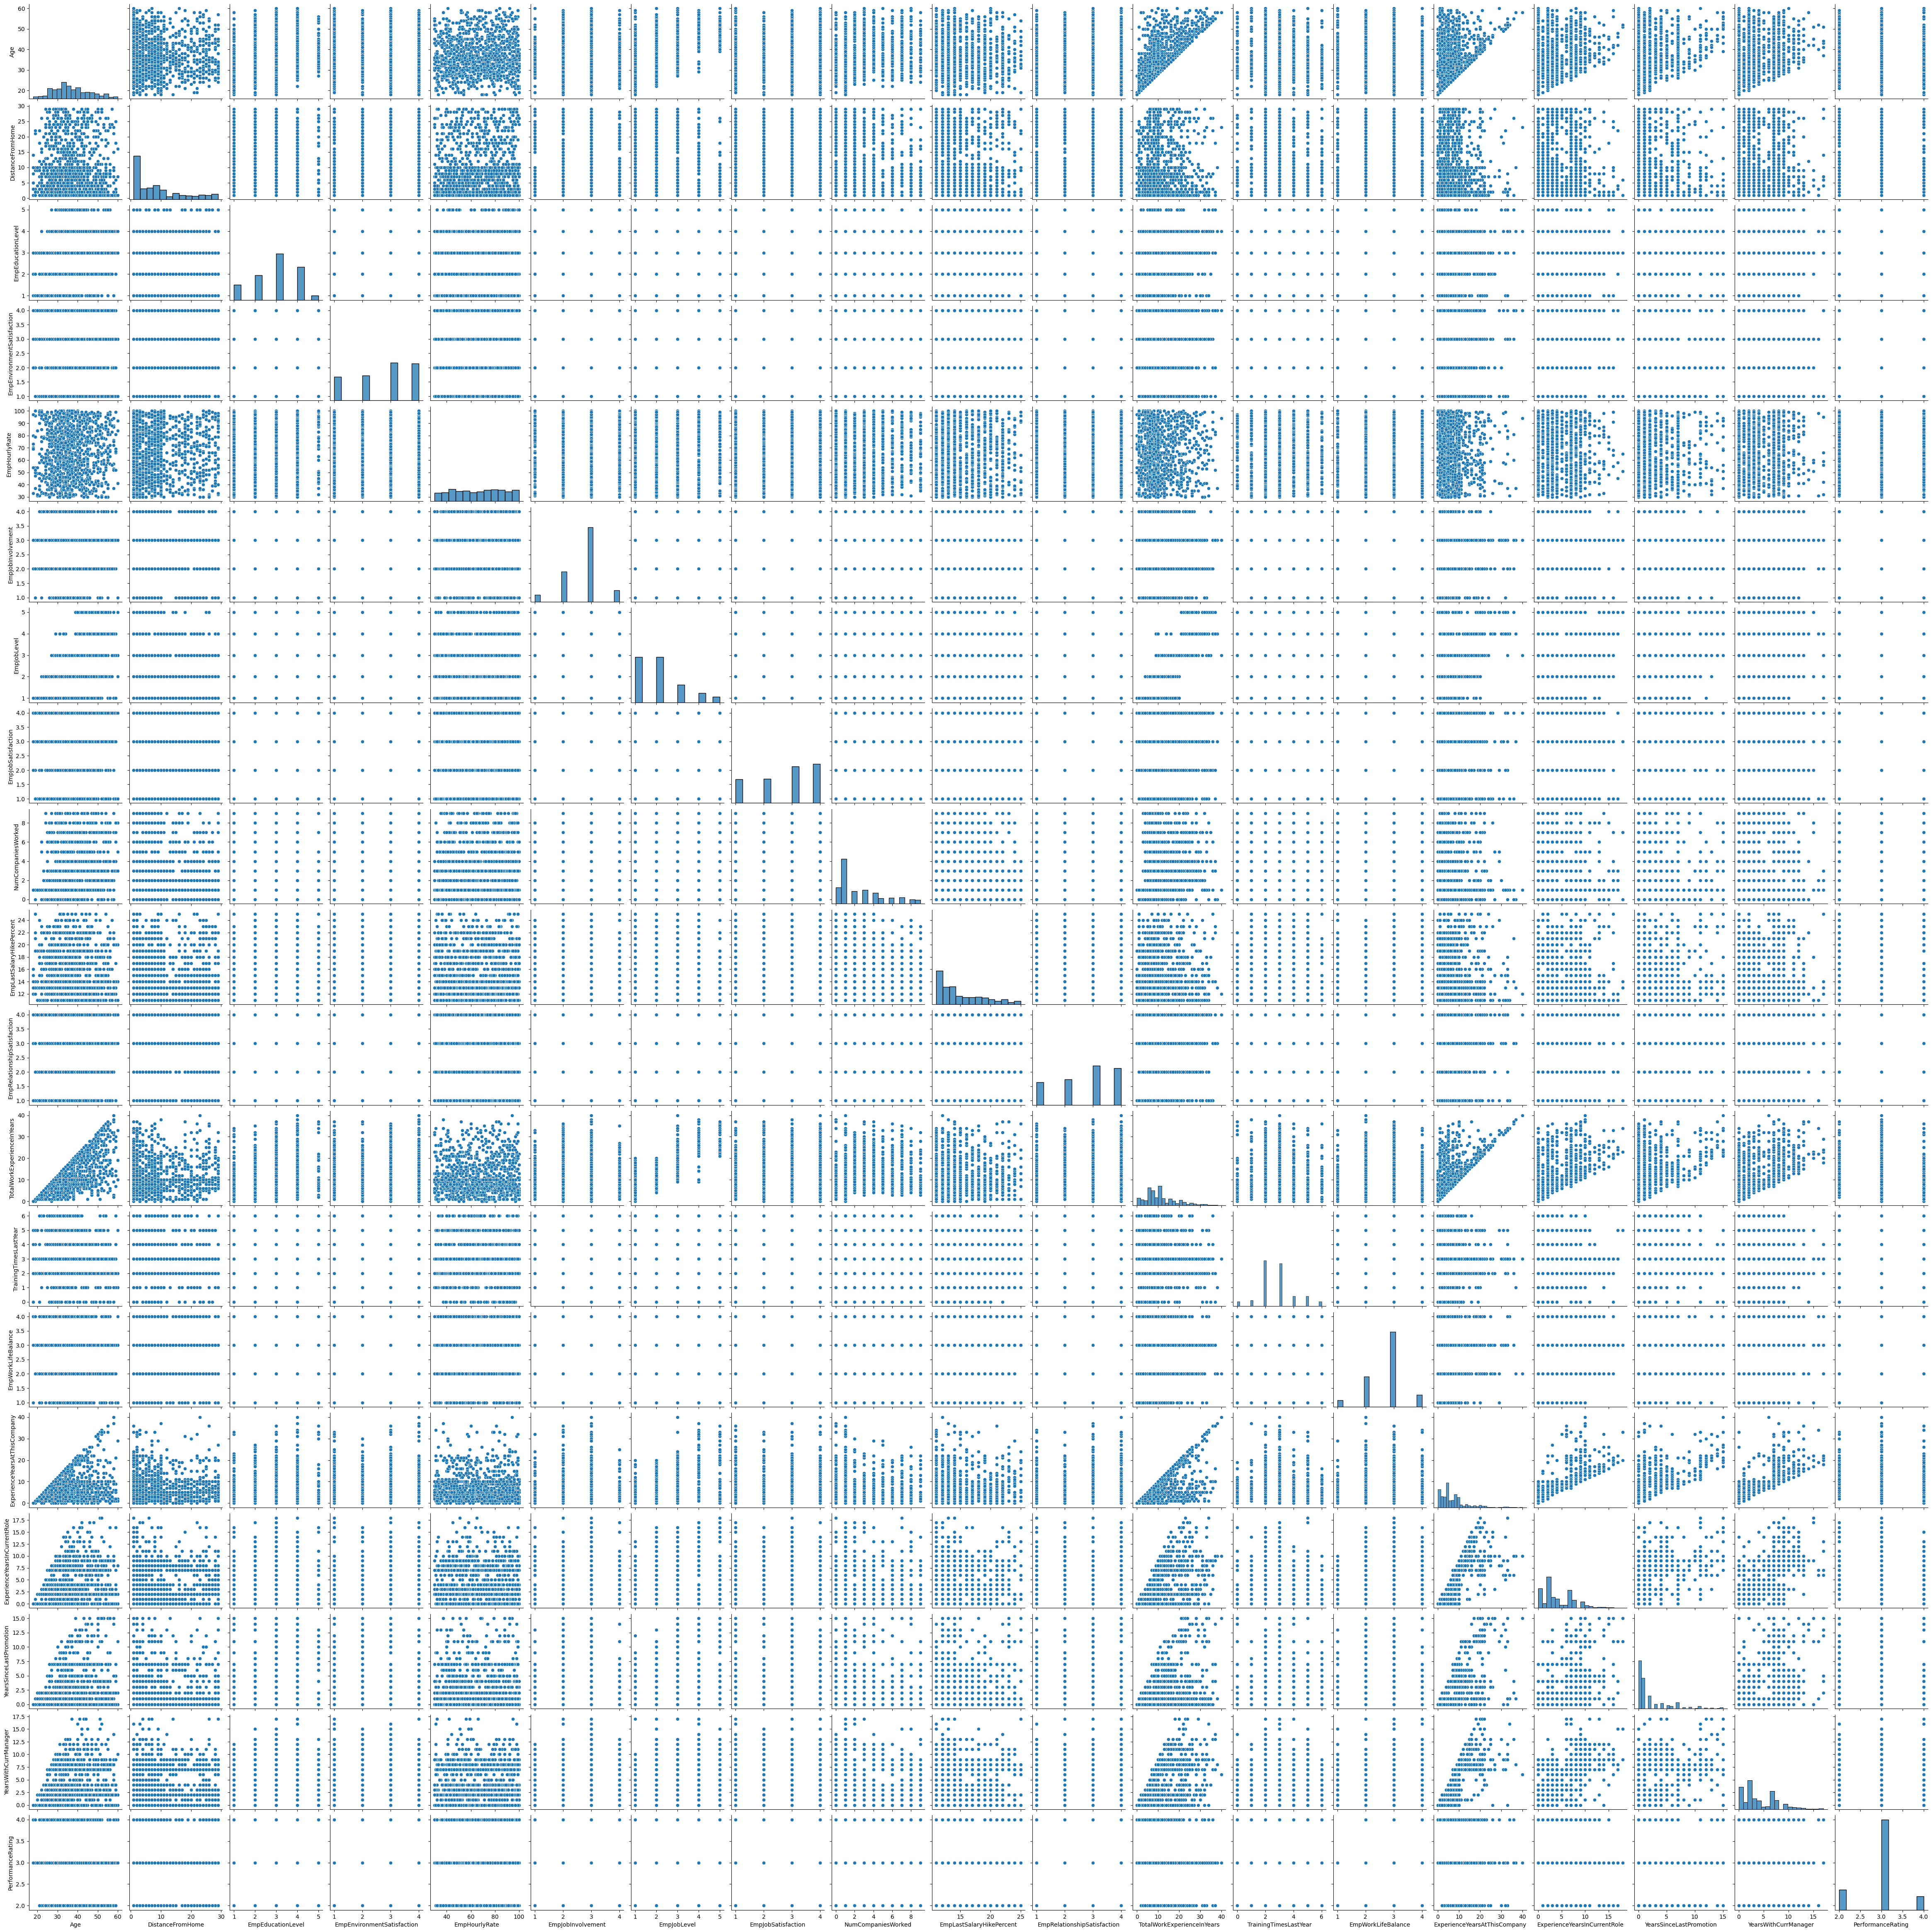

In [20]:
sns.pairplot(data)

# Data Preprocessing and Feature Enginnering

In [21]:
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

# checking duplicate value

In [22]:
data.duplicated().sum()

0

# Step 1 - Handling the missing value

In [23]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

# Dropping columns

In [24]:
l1=['EmpNumber']
data.drop(l1,axis=1,inplace=True)

In [25]:
data.shape

(1200, 27)

# Data cleaning

The raw data we have is completely clean. We checked for missing values but data contained no missing values. To get proper prediction we need to do label encoding for categorical values

# Step 2 - Converting categorical data to numerical data

In [26]:
# Loop through each column and check if it's categorical
categorical_columns = []
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the data type is 'object'
        categorical_columns.append(column)

print("Categorical columns:", categorical_columns)

Categorical columns: ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


In [27]:
from sklearn.preprocessing import LabelEncoder
LC=LabelEncoder()
data.Gender=LC.fit_transform(data.Gender)
data.EducationBackground=LC.fit_transform(data.EducationBackground)
data.MaritalStatus=LC.fit_transform(data.MaritalStatus)
data.EmpDepartment=LC.fit_transform(data.EmpDepartment)
data.EmpJobRole=LC.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency=LC.fit_transform(data.BusinessTravelFrequency)
data.OverTime=LC.fit_transform(data.OverTime)
data.Attrition=LC.fit_transform(data.Attrition)

# Step 3 - Checking the outlier

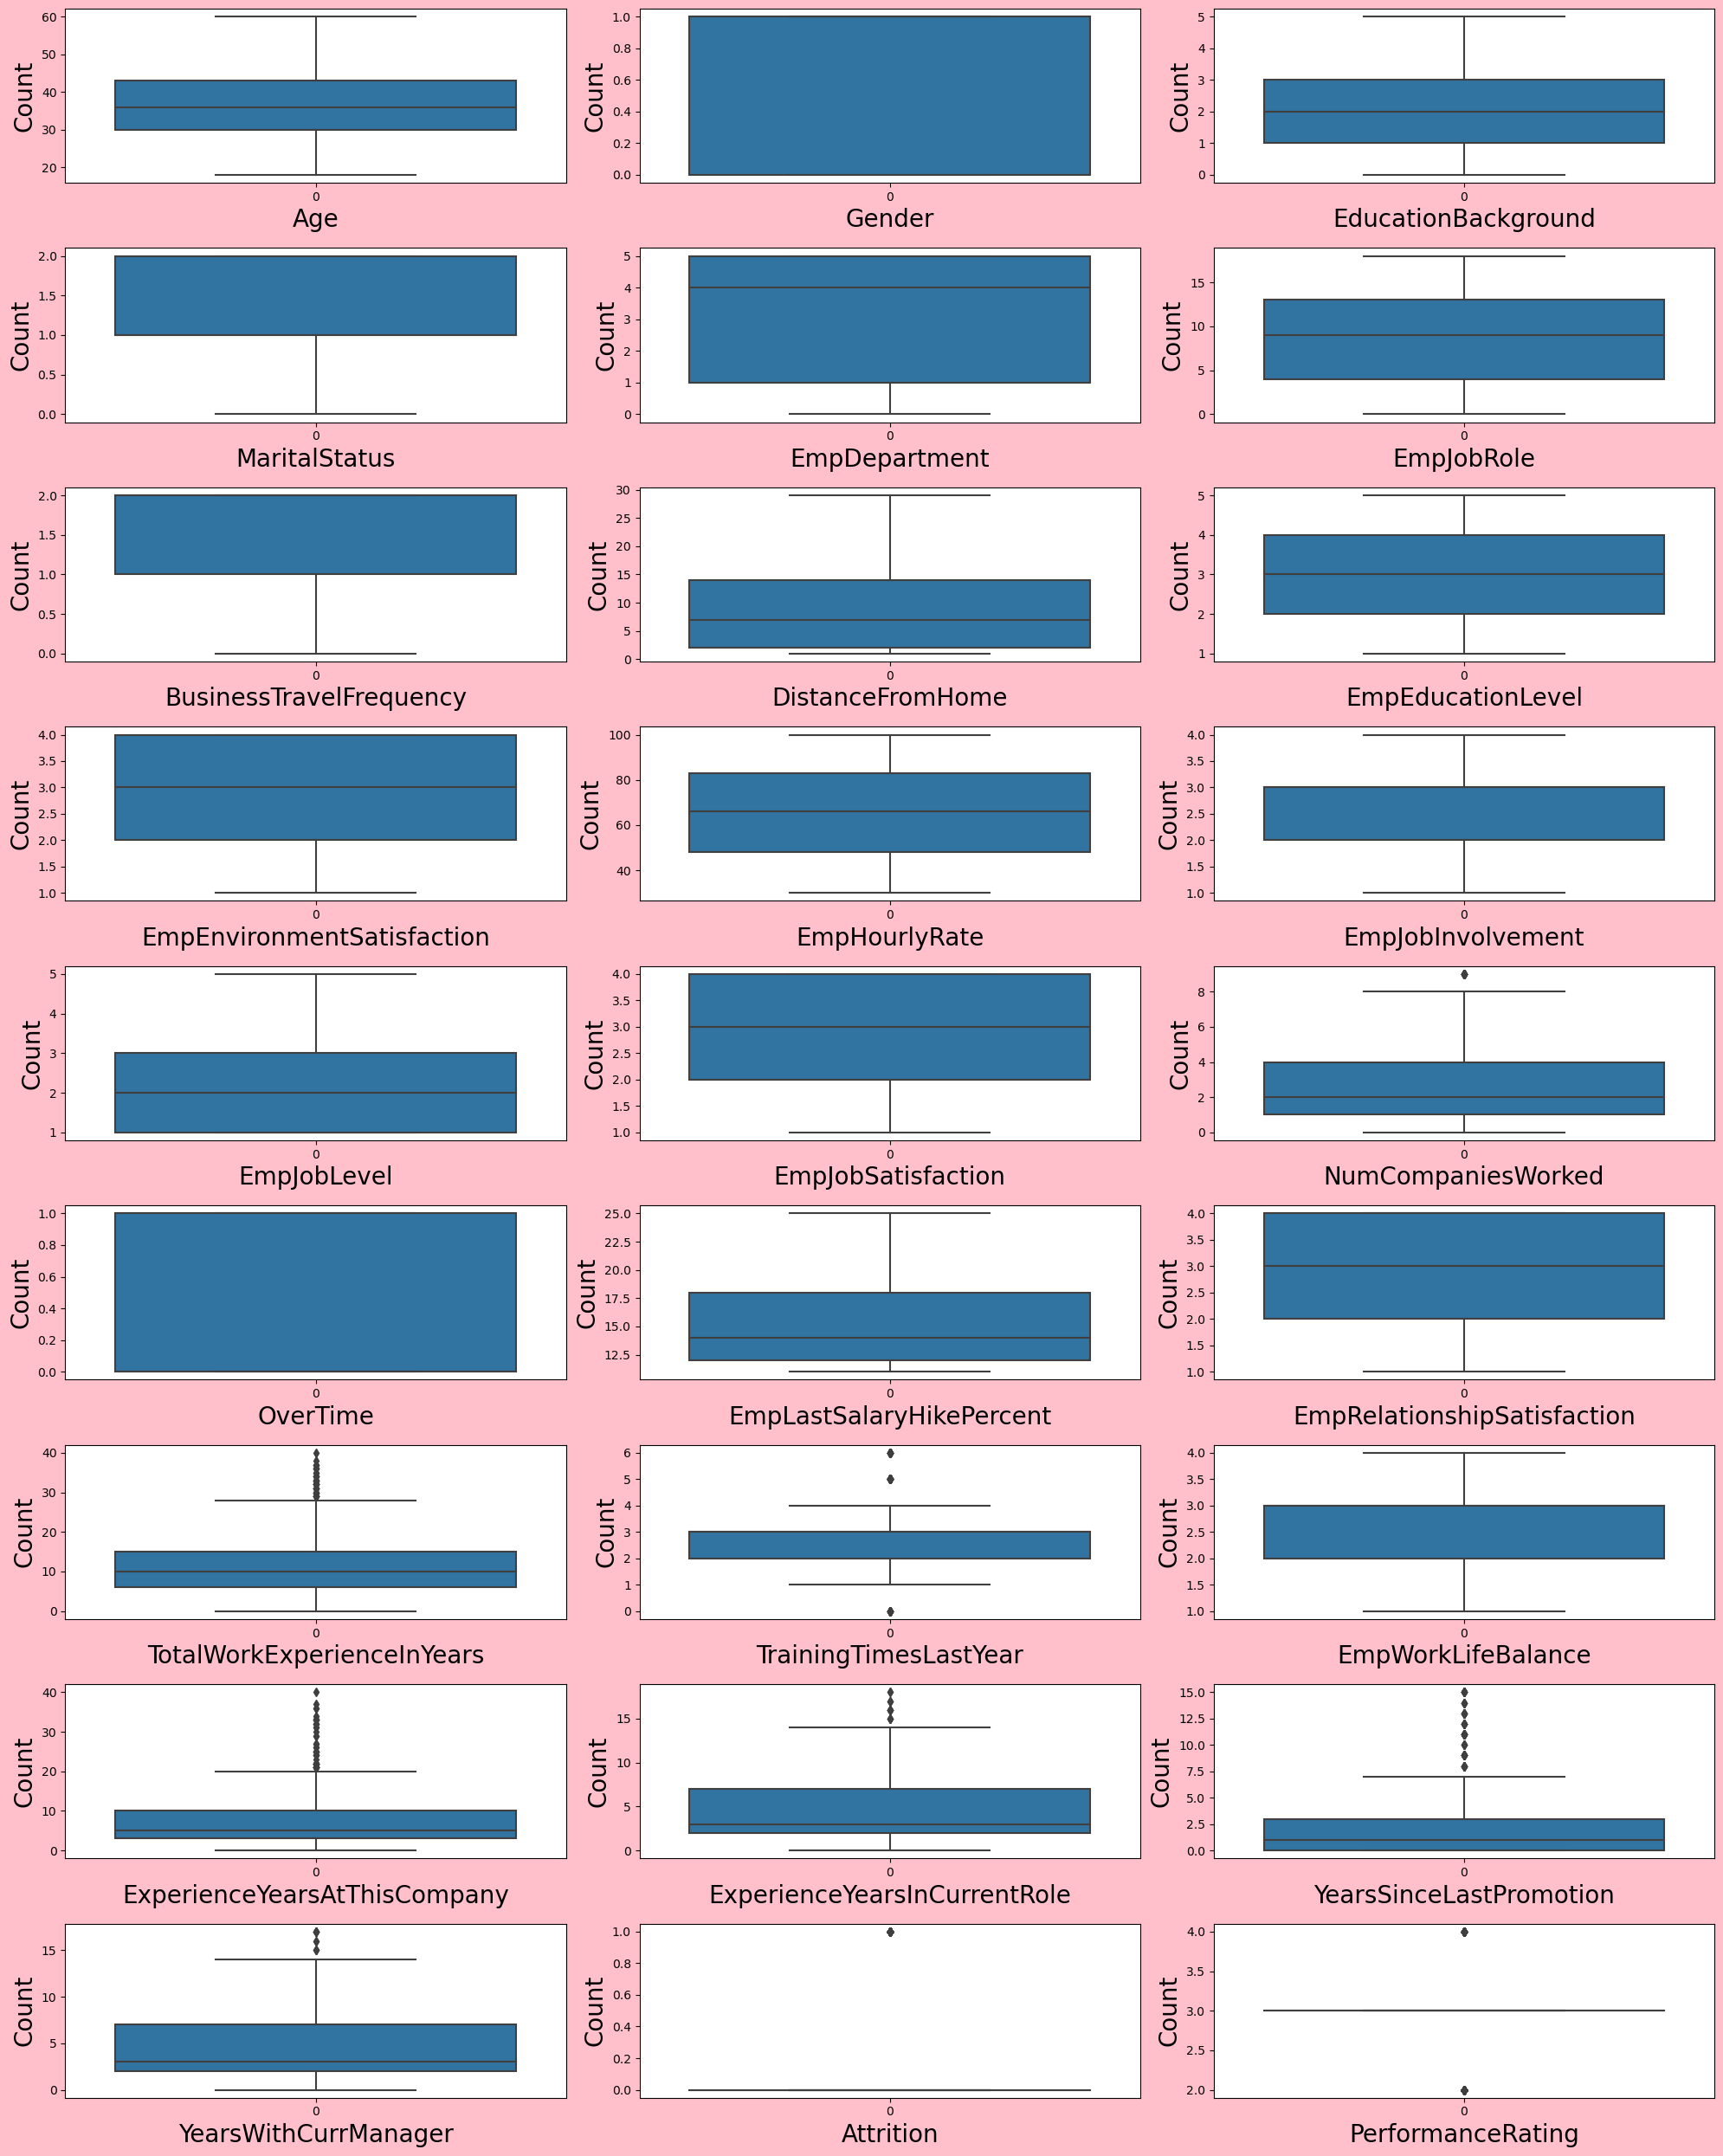

In [28]:
plt.figure(figsize=(20,25),facecolor='pink')
plotnumber=1

for column in data:
    if plotnumber<=27:
        ax=plt.subplot(9,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Step 4 - Handling the outlier

In [29]:
from scipy import stats
IQR = stats.iqr(data.TotalWorkExperienceInYears, interpolation = 'midpoint') 
Q1 = data.TotalWorkExperienceInYears.quantile(0.25)
Q3 =data.TotalWorkExperienceInYears.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR
print('IQR:',IQR)
print('Min Limit:',min_limit)
print('Max Limit:',max_limit)

IQR: 9.0
Min Limit: -7.5
Max Limit: 28.5


In [30]:
data.loc[data['TotalWorkExperienceInYears'] > max_limit]

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
17     56       1                    3              1              1   
25     52       1                    2              1              5   
48     50       1                    3              1              1   
72     51       0                    2              1              5   
77     53       0                    2              1              5   
96     53       0                    1              2              1   
100    50       1                    1              0              1   
149    50       1                    3              0              1   
173    59       0                    1              2              4   
178    52       0                    2              1              5   
192    50       1                    3              1              4   
199    55       1                    3              2              4   
277    50       0                    3              1              4   
292    54       0                    1              0              4   
295    54       1                    1              1              4   
308    55       1                    3              0              4   
312    51       1                    1              0              5   
342    56       1                    1              2              3   
347    51       1                    1              0              3   
351    58       0                    3              1              4   
356    51       0                    5              2              4   
361    56       1                    1              1              4   
387    54       0                    3              2              4   
388    58       0                    3              1              4   
424    49       1                    1              0              4   
450    50       1                    3              2              4   
471    53       0                    5              1              4   
475    55       1                    2              1              5   
490    50       1                    3              1              2   
525    49       0                    1              1              2   
528    54       0                    3              1              2   
589    55       1                    3              1              4   
615    58       1                    3              0              5   
642    48       1                    1              1              4   
678    58       0                    1              1              5   
703    55       1                    0              1              3   
777    53       0                    1              1              5   
816    50       0                    3              0              1   
845    58       1                    3              2              5   
867    58       0                    3              1              1   
921    52       1                    1              1              1   
958    50       0                    3              0              5   
962    52       1                    1              2              5   
989    55       1                    3              2              1   
1077   55       0                    1              2              1   
1101   52       0                    1              1              0   
1104   60       0                    1              1              1   
1116   57       1                    2              0              5   
1135   55       0                    1              2              5   
1156   49       1                    1              0              1   
1160   50       1                    3              1              3   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
17             3                        2                 9   
25             8                        2                 3   
48             3                        2                 2   
72       

In [31]:
data.loc[data['TotalWorkExperienceInYears'] < min_limit]

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

In [32]:
data.loc[data['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=np.median(data.TotalWorkExperienceInYears)

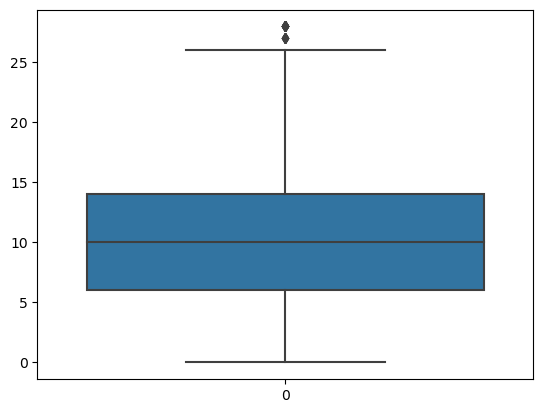

In [33]:
sns.boxplot(data.TotalWorkExperienceInYears)
plt.show()

In [34]:
data.TotalWorkExperienceInYears=np.sqrt(data.TotalWorkExperienceInYears)

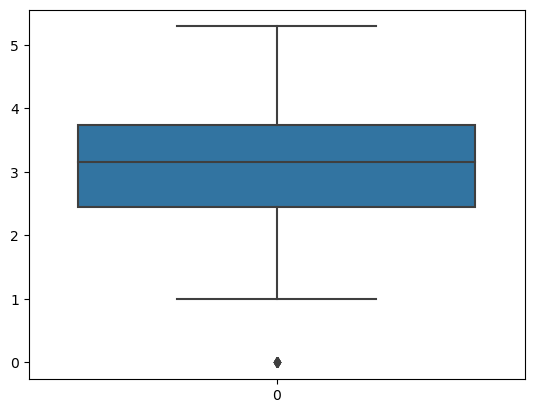

In [35]:
sns.boxplot(data.TotalWorkExperienceInYears)
plt.show()

In [36]:
IQR = stats.iqr(data.ExperienceYearsAtThisCompany, interpolation = 'midpoint') 
Q1 = data.ExperienceYearsAtThisCompany.quantile(0.25)
Q3 =data.ExperienceYearsAtThisCompany.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR
print('IQR:',IQR)
print('Min Limit:',min_limit)
print('Max Limit:',max_limit)

IQR: 7.0
Min Limit: -7.5
Max Limit: 20.5


In [37]:
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit]

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
3      41       1                    0              0              3   
11     47       0                    3              0              5   
25     52       1                    2              1              5   
52     47       0                    4              1              1   
100    50       1                    1              0              1   
168    39       0                    1              1              4   
175    41       0                    1              0              4   
178    52       0                    2              1              5   
181    39       0                    3              2              4   
216    42       1                    3              1              4   
252    42       1                    1              2              5   
272    46       0                    2              1              5   
304    44       1                    2              1              5   
307    45       0                    2              2              5   
308    55       1                    3              0              4   
312    51       1                    1              0              5   
316    44       1                    1              0              4   
320    43       0                    2              2              5   
347    51       1                    1              0              3   
450    50       1                    3              2              4   
459    40       1                    3              2              3   
471    53       0                    5              1              4   
475    55       1                    2              1              5   
490    50       1                    3              1              2   
492    44       0                    3              0              2   
555    45       1                    1              1              4   
557    45       0                    5              2              4   
571    40       1                    3              2              5   
613    41       0                    2              0              5   
617    47       0                    1              0              4   
642    48       1                    1              1              4   
658    48       0                    3              0              4   
777    53       0                    1              1              5   
785    44       0                    3              1              1   
816    50       0                    3              0              1   
817    59       0                    1              2              5   
838    40       1                    1              1              1   
845    58       1                    3              2              5   
862    43       1                    1              1              5   
867    58       0                    3              1              1   
911    46       0                    2              0              5   
921    52       1                    1              1              1   
956    42       1                    5              1              1   
962    52       1                    1              2              5   
978    40       1                    3              0              0   
989    55       1                    3              2              1   
1015   41       1                    1              2              5   
1024   45       1                    1              0              1   
1027   39       1                    3              1              1   
1036   39       1                    3              1              1   
1086   43       1                    1              0              1   
1094   39       1                    1              0              1   
1104   60       0                    1              1              1   
1117   50       1                    1              1              1   
1156   49       1                    1        

In [38]:
data.loc[data['ExperienceYearsAtThisCompany'] < min_limit]

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 27 columns]

In [39]:
data.loc[data['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=np.median(data.ExperienceYearsAtThisCompany)

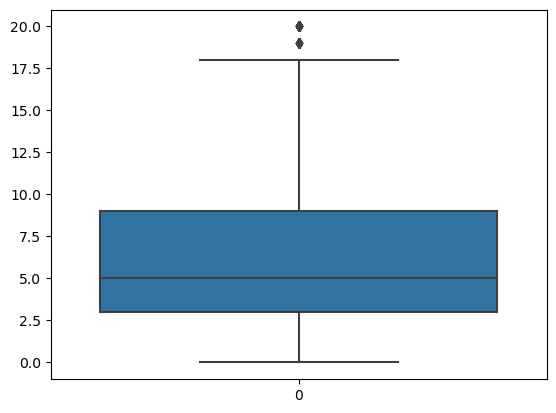

In [40]:
sns.boxplot(data.ExperienceYearsAtThisCompany)
plt.show()

In [41]:
data.ExperienceYearsAtThisCompany=np.sqrt(data.ExperienceYearsAtThisCompany)

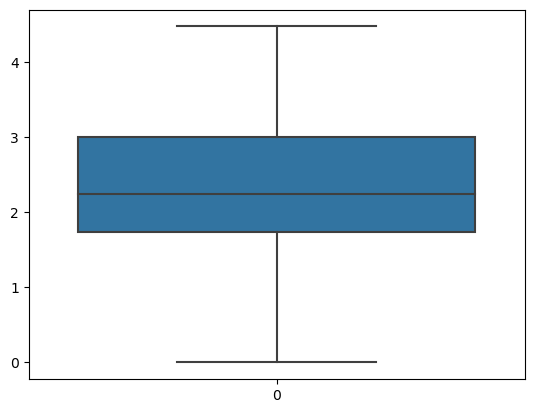

In [42]:
sns.boxplot(data.ExperienceYearsAtThisCompany)
plt.show()

In [43]:
IQR = stats.iqr(data.YearsSinceLastPromotion, interpolation = 'midpoint') 
Q1 = data.YearsSinceLastPromotion.quantile(0.25)
Q3 =data.YearsSinceLastPromotion.quantile(0.75)
min_limit=Q1 - 1.5*IQR
max_limit=Q3 + 1.5*IQR
print('IQR:',IQR)
print('Min Limit:',min_limit)
print('Max Limit:',max_limit)

IQR: 3.0
Min Limit: -4.5
Max Limit: 7.5


In [44]:
data.loc[data['YearsSinceLastPromotion'] > max_limit]

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
3      41       1                    0              0              3   
11     47       0                    3              0              5   
100    50       1                    1              0              1   
130    31       0                    3              1              1   
132    37       1                    1              1              5   
...   ...     ...                  ...            ...            ...   
1152   41       0                    1              1              5   
1160   50       1                    3              1              3   
1181   34       1                    1              1              1   
1185   35       1                    1              2              1   
1189   33       1                    1              2              1   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
3              8                        2                10   
11            13                        1                 3   
100            3                        0                 2   
130            3                        2                12   
132           13                        2                 1   
...          ...                      ...               ...   
1152           8                        2                 2   
1160           8                        1                 3   
1181          15                        2                 1   
1185          15                        2                 6   
1189          15                        1                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
3                     4                           2  ...   
11                    3                           4  ...   
100                   4                           1  ...   
130                   3                           4  ...   
132                   4                           1  ...   
...                 ...                         ...  ...   
1152                  5                           2  ...   
1160                  3                           1  ...   
1181                  5                           2  ...   
1185                  4                           2  ...   
1189                  3                           1  ...   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
3                               2                    4.795832   
11                              4                    5.291503   
100                             4                    3.162278   
130                             3                    3.162278   
132                             3                    4.123106   
...                           ...                         ...   
1152                            2                    4.690416   
1160                            3                    3.162278   
1181                            4                    3.162278   
1185                            2                    4.123106   
1189                            1                    3.162278   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
3                         2                   2                      2.236068   
11                        2                   2                      2.236068   
100                       3                   3                      2.236068   
130                       2                   1                      3.000000   
132                       2                   1                      3.741657   
...                     ...                 ...                           ...   
1152                      2                   3                      4.242641   
1160                      2                   3                      2.236068   
1181                      4                   2                      3.162278   
1185                      3                   3                      4.1

In [45]:
data.loc[data['YearsSinceLastPromotion'] > max_limit,'YearsSinceLastPromotion']=np.median(data.YearsSinceLastPromotion)

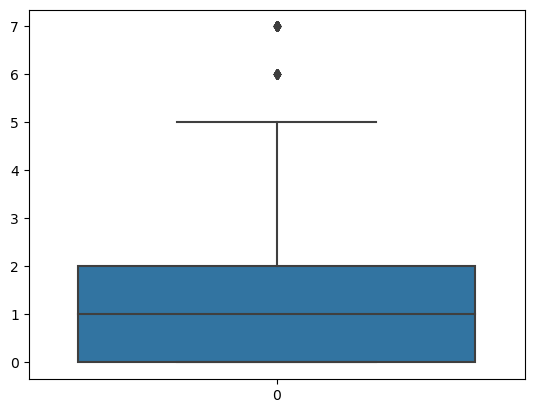

In [46]:
sns.boxplot(data.YearsSinceLastPromotion)
plt.show()

In [47]:
data.YearsSinceLastPromotion=np.sqrt(data.YearsSinceLastPromotion)

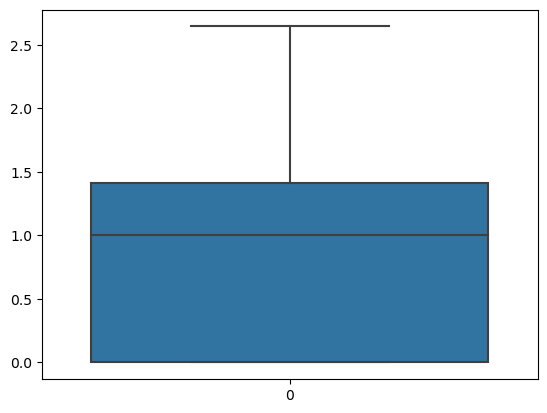

In [48]:
sns.boxplot(data.YearsSinceLastPromotion)
plt.show()

In [49]:
data.describe()

Age       Gender  EducationBackground  MaritalStatus  \
count  1200.000000  1200.000000           1200.00000    1200.000000   
mean     36.918333     0.604167              2.23500       1.096667   
std       9.087289     0.489233              1.31004       0.731050   
min      18.000000     0.000000              0.00000       0.000000   
25%      30.000000     0.000000              1.00000       1.000000   
50%      36.000000     1.000000              2.00000       1.000000   
75%      43.000000     1.000000              3.00000       2.000000   
max      60.000000     1.000000              5.00000       2.000000   

       EmpDepartment   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
count    1200.000000  1200.000000              1200.000000       1200.000000   
mean        3.215000     9.039167                 1.595000          9.165833   
std         1.696911     4.754451                 0.679234          8.176636   
min         0.000000     0.000000                 0.000000          1.000000   
25%         1.000000     4.000000                 1.000000          2.000000   
50%         4.000000     9.000000                 2.000000          7.000000   
75%         5.000000    13.000000                 2.000000         14.000000   
max         5.000000    18.000000                 2.000000         29.000000   

       EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
count         1200.00000                 1200.000000  ...   
mean             2.89250                    2.715833  ...   
std              1.04412                    1.090599  ...   
min              1.00000                    1.000000  ...   
25%              2.00000                    2.000000  ...   
50%              3.00000                    3.000000  ...   
75%              4.00000                    4.000000  ...   
max              5.00000                    4.000000  ...   

       EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
count                  1200.000000                 1200.000000   
mean                      2.725000                    3.050259   
std                       1.075642                    1.034075   
min                       1.000000                    0.000000   
25%                       2.000000                    2.449490   
50%                       3.000000                    3.162278   
75%                       4.000000                    3.741657   
max                       4.000000                    5.291503   

       TrainingTimesLastYear  EmpWorkLifeBalance  \
count            1200.000000         1200.000000   
mean                2.785833            2.744167   
std                 1.263446            0.699374   
min                 0.000000            1.000000   
25%                 2.000000            2.000000   
50%                 3.000000            3.000000   
75%                 3.000000            3.000000   
max                 6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       2.281731                      4.291667   
std                        0.945754                      3.613744   
min                        0.000000                      0.000000   
25%                        1.732051                      2.000000   
50%                        2.236068                      3.000000   
75%                        3.000000                      7.000000   
max                        4.472136                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager    Attrition  \
count              1200.000000           1200.000000  1200.000000   
mean                  0.874695              4.105000     0.148333   
std                   0.827433              3.541576     0.355578   
min                   0.000000              0.000000     0.000000   
25%                   0.000000              2.000000     0.000000   
50% 

# Insights-
By leveraging insights derived from the data, organizations can make informed decisions regarding talent management, training and development initiatives, performance appraisal processes, and employee engagement strategies. This can ultimately contribute to fostering a more productive and satisfied workforce.

# Step 5 - Scaling the data

In [50]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['Age','PerformanceRating']
data1=sc.fit_transform(data.drop(dl,axis=1))

In [51]:
data1

array([[1.        , 0.4       , 1.        , ..., 0.        , 0.47058824,
        0.        ],
       [1.        , 0.4       , 1.        , ..., 0.37796447, 0.41176471,
        0.        ],
       [1.        , 0.2       , 0.5       , ..., 0.37796447, 0.70588235,
        0.        ],
       ...,
       [1.        , 0.6       , 0.5       , ..., 0.65465367, 0.47058824,
        0.        ],
       [0.        , 0.6       , 1.        , ..., 1.        , 0.41176471,
        0.        ],
       [0.        , 0.2       , 1.        , ..., 0.53452248, 0.        ,
        1.        ]])

In [52]:
con_data=data[['Age','PerformanceRating']]
con_data

Age  PerformanceRating
0      32                  3
1      47                  3
2      40                  4
3      41                  3
4      60                  3
...   ...                ...
1195   27                  4
1196   37                  3
1197   50                  3
1198   34                  3
1199   24                  2

[1200 rows x 2 columns]

In [53]:
data.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [54]:
# type(data1)
data2=pd.DataFrame(data1,columns=['Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'])

In [55]:
data2

Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0        1.0                  0.4            1.0            1.0    0.722222   
1        1.0                  0.4            1.0            1.0    0.722222   
2        1.0                  0.2            0.5            1.0    0.722222   
3        1.0                  0.0            0.0            0.6    0.444444   
4        1.0                  0.4            1.0            1.0    0.722222   
...      ...                  ...            ...            ...         ...   
1195     0.0                  0.6            0.0            1.0    0.722222   
1196     1.0                  0.2            1.0            0.2    0.833333   
1197     1.0                  0.6            0.5            0.2    0.833333   
1198     0.0                  0.6            1.0            0.0    0.055556   
1199     0.0                  0.2            1.0            1.0    0.722222   

      BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                         1.0          0.321429               0.50   
1                         1.0          0.464286               0.75   
2                         0.5          0.142857               0.75   
3                         1.0          0.321429               0.75   
4                         1.0          0.535714               0.75   
...                       ...               ...                ...   
1195                      0.5          0.071429               0.00   
1196                      1.0          0.321429               0.25   
1197                      1.0          0.964286               0.00   
1198                      1.0          0.285714               0.50   
1199                      1.0          0.071429               0.25   

      EmpEnvironmentSatisfaction  EmpHourlyRate  ...  \
0                       1.000000       0.357143  ...   
1                       1.000000       0.171429  ...   
2                       1.000000       0.257143  ...   
3                       0.333333       0.614286  ...   
4                       0.000000       0.771429  ...   
...                          ...            ...  ...   
1195                    1.000000       0.585714  ...   
1196                    1.000000       0.714286  ...   
1197                    1.000000       0.628571  ...   
1198                    1.000000       0.228571  ...   
1199                    0.000000       0.500000  ...   

      EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0                     0.071429                     1.000000   
1                     0.071429                     1.000000   
2                     0.714286                     0.666667   
3                     0.285714                     0.333333   
4                     0.214286                     1.000000   
...                        ...                          ...   
1195                  0.642857                     0.333333   
1196                  0.428571                     0.000000   
1197                  0.000000                     0.666667   
1198                  0.214286                     0.333333   
1199                  0.214286                     0.000000   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                       0.597614               0.333333            0.333333   
1                       0.845154               0.333333            0.666667   
2                       0.845154               0.333333            0.666667   
3                       0.906327               0.333333            0.333333   
4                       0.597614               0.166667            0.666667   
...                          ...                    ...                 ...   
1195                    0.462910               0.500000            0.666667   
1196                    0.377964               0.333333            0.666667   
1197                    0.845154               0.500000            0.666667

In [56]:
final_df=pd.concat([data2,con_data],axis=1)

In [57]:
final_df

Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0        1.0                  0.4            1.0            1.0    0.722222   
1        1.0                  0.4            1.0            1.0    0.722222   
2        1.0                  0.2            0.5            1.0    0.722222   
3        1.0                  0.0            0.0            0.6    0.444444   
4        1.0                  0.4            1.0            1.0    0.722222   
...      ...                  ...            ...            ...         ...   
1195     0.0                  0.6            0.0            1.0    0.722222   
1196     1.0                  0.2            1.0            0.2    0.833333   
1197     1.0                  0.6            0.5            0.2    0.833333   
1198     0.0                  0.6            1.0            0.0    0.055556   
1199     0.0                  0.2            1.0            1.0    0.722222   

      BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                         1.0          0.321429               0.50   
1                         1.0          0.464286               0.75   
2                         0.5          0.142857               0.75   
3                         1.0          0.321429               0.75   
4                         1.0          0.535714               0.75   
...                       ...               ...                ...   
1195                      0.5          0.071429               0.00   
1196                      1.0          0.321429               0.25   
1197                      1.0          0.964286               0.00   
1198                      1.0          0.285714               0.50   
1199                      1.0          0.071429               0.25   

      EmpEnvironmentSatisfaction  EmpHourlyRate  ...  \
0                       1.000000       0.357143  ...   
1                       1.000000       0.171429  ...   
2                       1.000000       0.257143  ...   
3                       0.333333       0.614286  ...   
4                       0.000000       0.771429  ...   
...                          ...            ...  ...   
1195                    1.000000       0.585714  ...   
1196                    1.000000       0.714286  ...   
1197                    1.000000       0.628571  ...   
1198                    1.000000       0.228571  ...   
1199                    0.000000       0.500000  ...   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                       0.597614               0.333333            0.333333   
1                       0.845154               0.333333            0.666667   
2                       0.845154               0.333333            0.666667   
3                       0.906327               0.333333            0.333333   
4                       0.597614               0.166667            0.666667   
...                          ...                    ...                 ...   
1195                    0.462910               0.500000            0.666667   
1196                    0.377964               0.333333            0.666667   
1197                    0.845154               0.500000            0.666667   
1198                    0.566947               0.500000            1.000000   
1199                    0.377964               0.500000            0.666667   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                         0.707107                      0.388889   
1                         0.591608                      0.388889   
2                         0.948683                      0.722222   
3                         0.500000                      0.333333   
4                         0.316228                      0.111111   
...                            ...                           ...   
1195                      0.547723                      0.277778   
1196                      0.223607                

In [58]:
final_df.describe()

Gender  EducationBackground  MaritalStatus  EmpDepartment  \
count  1200.000000          1200.000000    1200.000000    1200.000000   
mean      0.604167             0.447000       0.548333       0.643000   
std       0.489233             0.262008       0.365525       0.339382   
min       0.000000             0.000000       0.000000       0.000000   
25%       0.000000             0.200000       0.500000       0.200000   
50%       1.000000             0.400000       0.500000       0.800000   
75%       1.000000             0.600000       1.000000       1.000000   
max       1.000000             1.000000       1.000000       1.000000   

        EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
count  1200.000000              1200.000000       1200.000000   
mean      0.502176                 0.797500          0.291637   
std       0.264136                 0.339617          0.292023   
min       0.000000                 0.000000          0.000000   
25%       0.222222                 0.500000          0.035714   
50%       0.500000                 1.000000          0.214286   
75%       0.722222                 1.000000          0.464286   
max       1.000000                 1.000000          1.000000   

       EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  ...  \
count        1200.000000                 1200.000000    1200.000000  ...   
mean            0.473125                    0.571944       0.514024  ...   
std             0.261030                    0.363533       0.288733  ...   
min             0.000000                    0.000000       0.000000  ...   
25%             0.250000                    0.333333       0.257143  ...   
50%             0.500000                    0.666667       0.514286  ...   
75%             0.750000                    1.000000       0.757143  ...   
max             1.000000                    1.000000       1.000000  ...   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                     0.576445               0.464306            0.581389   
std                      0.195422               0.210574            0.233125   
min                      0.000000               0.000000            0.000000   
25%                      0.462910               0.333333            0.333333   
50%                      0.597614               0.500000            0.666667   
75%                      0.707107               0.500000            0.666667   
max                      1.000000               1.000000            1.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       0.510210                      0.238426   
std                        0.211477                      0.200764   
min                        0.000000                      0.000000   
25%                        0.387298                      0.111111   
50%                        0.500000                      0.166667   
75%                        0.670820                      0.388889   
max                        1.000000                      1.000000   

       YearsSinceLastPromotion  YearsWithCurrManager    Attrition  \
count              1200.000000           1200.000000  1200.000000   
mean                  0.330604              0.241471     0.148333   
std                   0.312740              0.208328     0.355578   
min                   0.000000              0.000000     0.000000   
25%                   0.000000              0.117647     0.000000   
50%                   0.377964              0.176471     0.000000   
75%                   0.534522              0.411765     0.000000   
max                   1.000000              1.000000     1.000000   

               Age  PerformanceRating  
count  1200.000000        1200.000000  
mean     36.918333           2.948333 

In [59]:
final_df.isnull().sum()

Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
Age                             0
PerformanceRating               0
dtype: int64

# Step 6 - Feature Selection

<Axes: >

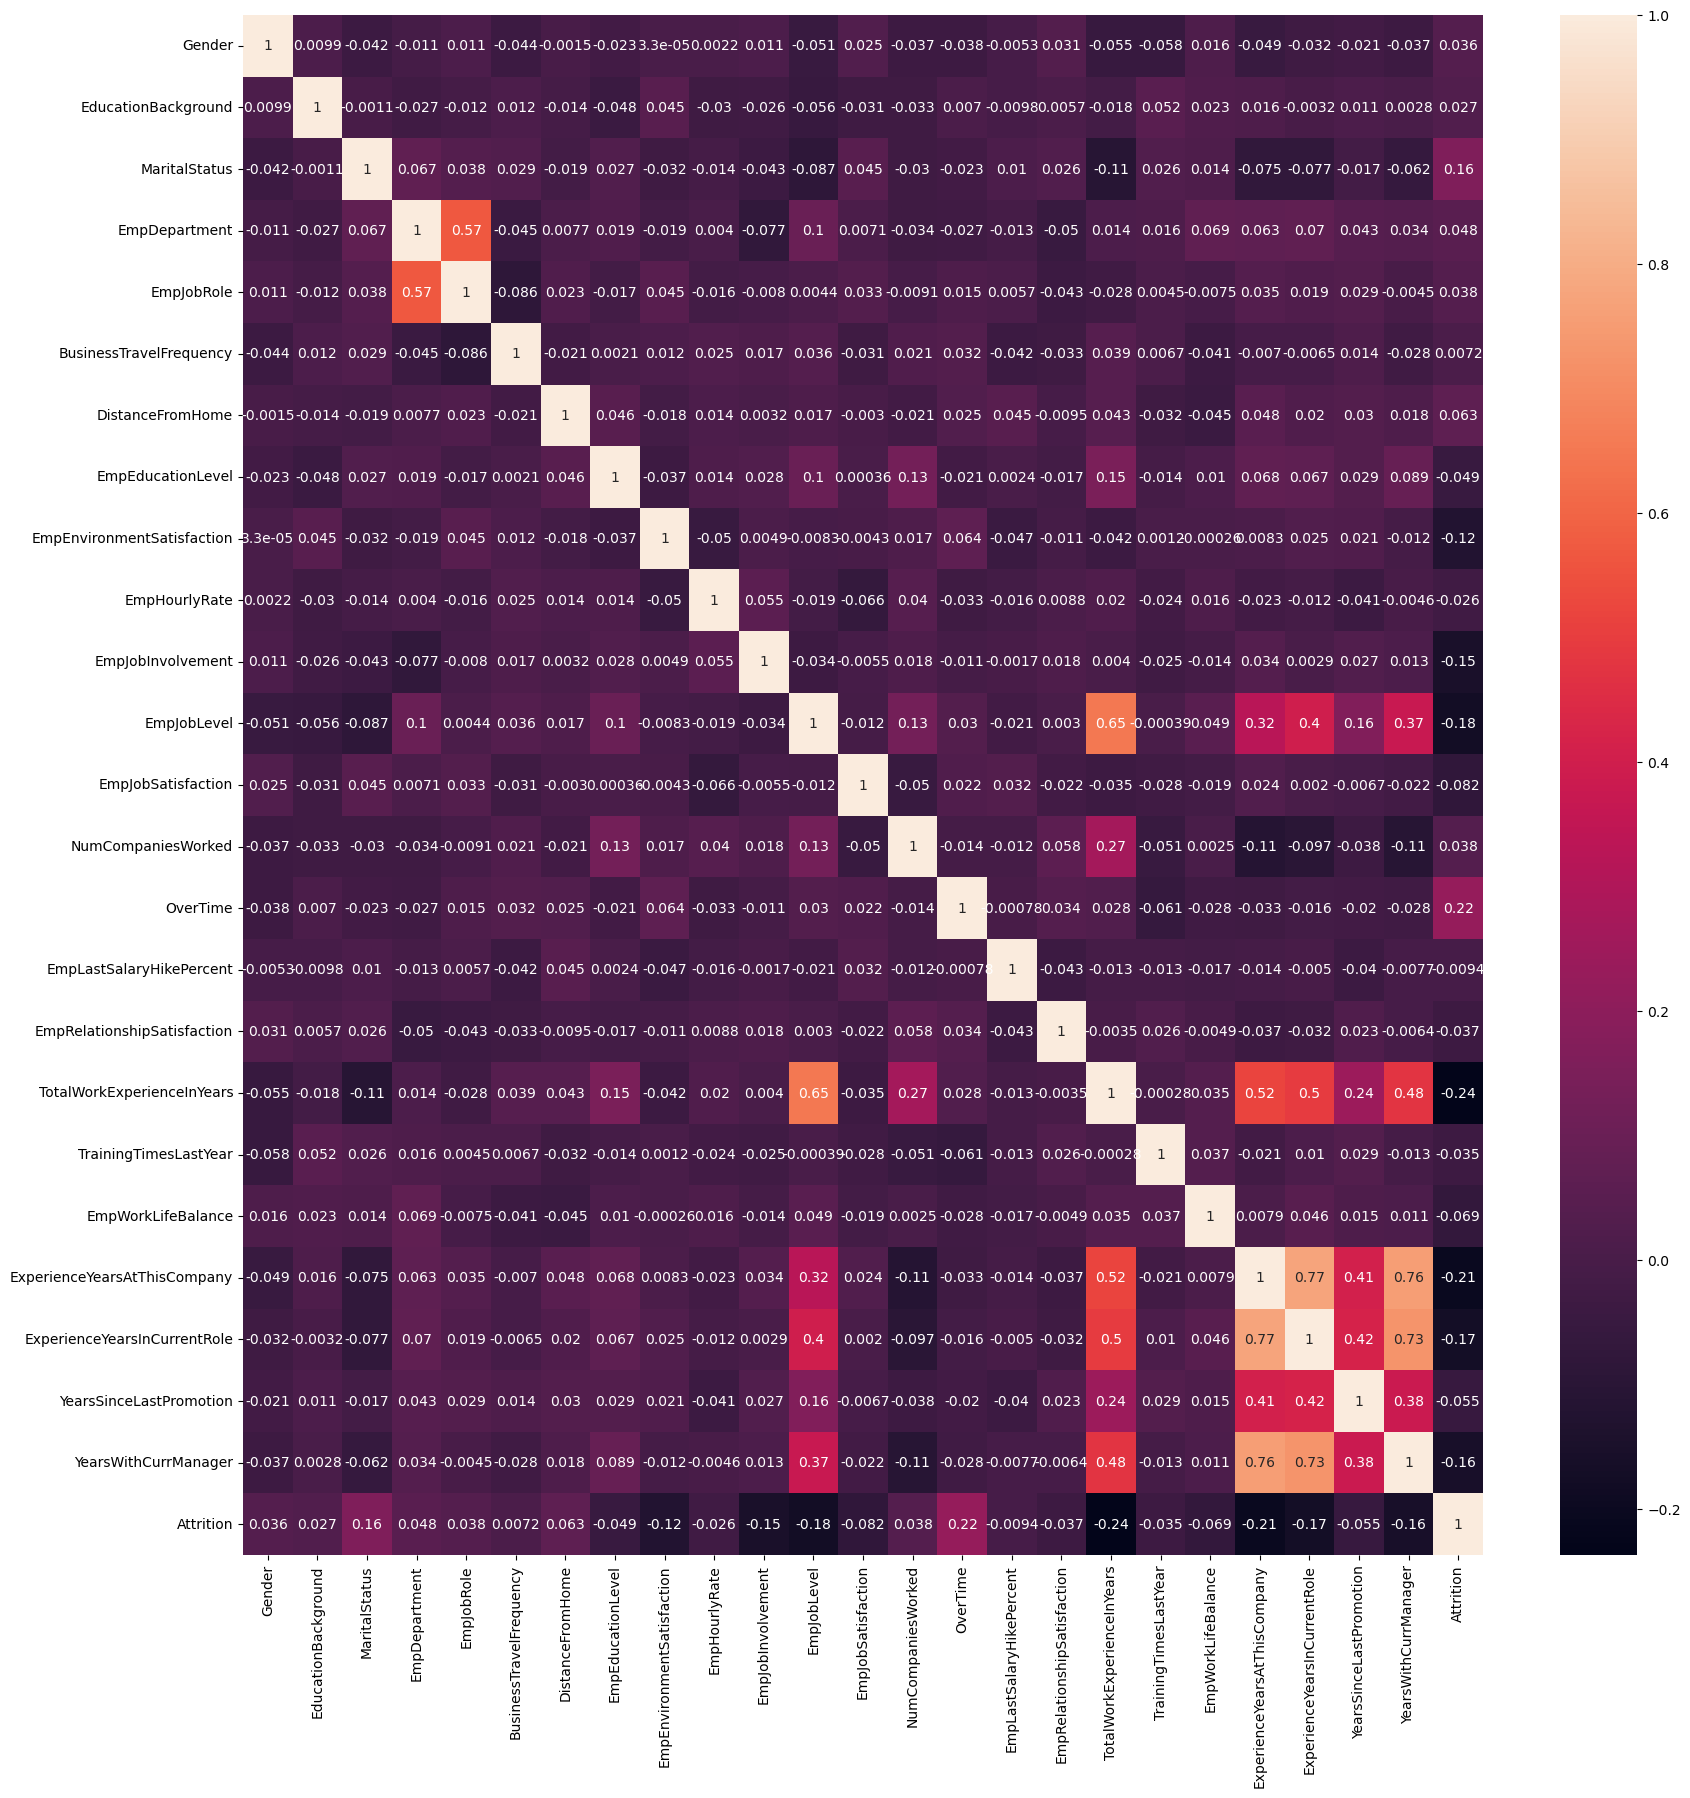

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(data2.corr(),annot=True)

In [61]:
data.corr()

Age    Gender  EducationBackground  \
Age                           1.000000 -0.040107            -0.055905   
Gender                       -0.040107  1.000000             0.009922   
EducationBackground          -0.055905  0.009922             1.000000   
MaritalStatus                -0.098368 -0.042169            -0.001097   
EmpDepartment                -0.000104 -0.010925            -0.026874   
EmpJobRole                   -0.037665  0.011332            -0.012325   
BusinessTravelFrequency       0.040579 -0.043608             0.012382   
DistanceFromHome              0.020937 -0.001507            -0.013919   
EmpEducationLevel             0.207313 -0.022960            -0.047978   
EmpEnvironmentSatisfaction    0.013814  0.000033             0.045028   
EmpHourlyRate                 0.062867  0.002218            -0.030234   
EmpJobInvolvement             0.027216  0.010949            -0.025505   
EmpJobLevel                   0.509139 -0.050685            -0.056338   
EmpJobSatisfaction           -0.002436  0.024680            -0.030977   
NumCompaniesWorked            0.284408 -0.036675            -0.032879   
OverTime                      0.051910 -0.038410             0.007046   
EmpLastSalaryHikePercent     -0.006105 -0.005319            -0.009788   
EmpRelationshipSatisfaction   0.049749  0.030707             0.005652   
TotalWorkExperienceInYears    0.577797 -0.055426            -0.017602   
TrainingTimesLastYear        -0.016053 -0.057654             0.051596   
EmpWorkLifeBalance           -0.019563  0.015793             0.022890   
ExperienceYearsAtThisCompany  0.187999 -0.049298             0.016145   
ExperienceYearsInCurrentRole  0.217163 -0.031823            -0.003215   
YearsSinceLastPromotion       0.137444 -0.021020             0.011249   
YearsWithCurrManager          0.205098 -0.036643             0.002767   
Attrition                    -0.189317  0.035758             0.027161   
PerformanceRating            -0.040164 -0.001780             0.005607   

                              MaritalStatus  EmpDepartment  EmpJobRole  \
Age                               -0.098368      -0.000104   -0.037665   
Gender                            -0.042169      -0.010925    0.011332   
EducationBackground               -0.001097      -0.026874   -0.012325   
MaritalStatus                      1.000000       0.067272    0.038023   
EmpDepartment                      0.067272       1.000000    0.568973   
EmpJobRole                         0.038023       0.568973    1.000000   
BusinessTravelFrequency            0.028520      -0.045233   -0.086251   
DistanceFromHome                  -0.019148       0.007707    0.022939   
EmpEducationLevel                  0.026737       0.019175   -0.016792   
EmpEnvironmentSatisfaction        -0.032467      -0.019237    0.044612   
EmpHourlyRate                     -0.013540       0.003957   -0.016179   
EmpJobInvolvement                 -0.043355      -0.076988   -0.008034   
EmpJobLevel                       -0.087359       0.100526    0.004406   
EmpJobSatisfaction                 0.044593       0.007150    0.032916   
NumCompaniesWorked                -0.030095      -0.033950   -0.009111   
OverTime                          -0.022833      -0.026841    0.015075   
EmpLastSalaryHikePercent           0.010128      -0.012661    0.005735   
EmpRelationshipSatisfaction        0.026410      -0.050286   -0.043067   
TotalWorkExperienceInYears        -0.108810       0.013778   -0.027831   
TrainingTimesLastYear              0.026045       0.016438    0.004452   
EmpWorkLifeBalance                 0.014154       0.068875   -0.007519   
ExperienceYearsAtThisCompany      -0.075391       0.063229    0.035112   
ExperienceYearsInCurrentRole      -0.076663       0.069602    0.019383   
YearsSinceLastPromotion           -0.017012       0.042840    0.028547   
YearsWithCurrManager              -0.061908       0.033850   -0.004504   
Attrition                          0.162969       0.048006    0.03

There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1. Standardization and Label Encoding was also used for feature transformation.
A separate analysis considering all the predictors was carried out but it resulted in decreasing the accuracy. Similarly, Principal Component Analysis also reduces the accuracy. Top 3 factors which affect the employee performance are-
1.Employee EnvironmentSatisfaction
2.Employee Last Salary Hike Percent
3.Years Since Last Promotion.


# Step 7 - Model Creation

In [62]:
final_df

Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0        1.0                  0.4            1.0            1.0    0.722222   
1        1.0                  0.4            1.0            1.0    0.722222   
2        1.0                  0.2            0.5            1.0    0.722222   
3        1.0                  0.0            0.0            0.6    0.444444   
4        1.0                  0.4            1.0            1.0    0.722222   
...      ...                  ...            ...            ...         ...   
1195     0.0                  0.6            0.0            1.0    0.722222   
1196     1.0                  0.2            1.0            0.2    0.833333   
1197     1.0                  0.6            0.5            0.2    0.833333   
1198     0.0                  0.6            1.0            0.0    0.055556   
1199     0.0                  0.2            1.0            1.0    0.722222   

      BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                         1.0          0.321429               0.50   
1                         1.0          0.464286               0.75   
2                         0.5          0.142857               0.75   
3                         1.0          0.321429               0.75   
4                         1.0          0.535714               0.75   
...                       ...               ...                ...   
1195                      0.5          0.071429               0.00   
1196                      1.0          0.321429               0.25   
1197                      1.0          0.964286               0.00   
1198                      1.0          0.285714               0.50   
1199                      1.0          0.071429               0.25   

      EmpEnvironmentSatisfaction  EmpHourlyRate  ...  \
0                       1.000000       0.357143  ...   
1                       1.000000       0.171429  ...   
2                       1.000000       0.257143  ...   
3                       0.333333       0.614286  ...   
4                       0.000000       0.771429  ...   
...                          ...            ...  ...   
1195                    1.000000       0.585714  ...   
1196                    1.000000       0.714286  ...   
1197                    1.000000       0.628571  ...   
1198                    1.000000       0.228571  ...   
1199                    0.000000       0.500000  ...   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                       0.597614               0.333333            0.333333   
1                       0.845154               0.333333            0.666667   
2                       0.845154               0.333333            0.666667   
3                       0.906327               0.333333            0.333333   
4                       0.597614               0.166667            0.666667   
...                          ...                    ...                 ...   
1195                    0.462910               0.500000            0.666667   
1196                    0.377964               0.333333            0.666667   
1197                    0.845154               0.500000            0.666667   
1198                    0.566947               0.500000            1.000000   
1199                    0.377964               0.500000            0.666667   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                         0.707107                      0.388889   
1                         0.591608                      0.388889   
2                         0.948683                      0.722222   
3                         0.500000                      0.333333   
4                         0.316228                      0.111111   
...                            ...                           ...   
1195                      0.547723                      0.277778   
1196                      0.223607                

# Step 1 - Creating independent and dependent variable

In [63]:
X=final_df.iloc[:,:-1]
y=final_df.PerformanceRating

In [64]:
X

Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0        1.0                  0.4            1.0            1.0    0.722222   
1        1.0                  0.4            1.0            1.0    0.722222   
2        1.0                  0.2            0.5            1.0    0.722222   
3        1.0                  0.0            0.0            0.6    0.444444   
4        1.0                  0.4            1.0            1.0    0.722222   
...      ...                  ...            ...            ...         ...   
1195     0.0                  0.6            0.0            1.0    0.722222   
1196     1.0                  0.2            1.0            0.2    0.833333   
1197     1.0                  0.6            0.5            0.2    0.833333   
1198     0.0                  0.6            1.0            0.0    0.055556   
1199     0.0                  0.2            1.0            1.0    0.722222   

      BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                         1.0          0.321429               0.50   
1                         1.0          0.464286               0.75   
2                         0.5          0.142857               0.75   
3                         1.0          0.321429               0.75   
4                         1.0          0.535714               0.75   
...                       ...               ...                ...   
1195                      0.5          0.071429               0.00   
1196                      1.0          0.321429               0.25   
1197                      1.0          0.964286               0.00   
1198                      1.0          0.285714               0.50   
1199                      1.0          0.071429               0.25   

      EmpEnvironmentSatisfaction  EmpHourlyRate  ...  \
0                       1.000000       0.357143  ...   
1                       1.000000       0.171429  ...   
2                       1.000000       0.257143  ...   
3                       0.333333       0.614286  ...   
4                       0.000000       0.771429  ...   
...                          ...            ...  ...   
1195                    1.000000       0.585714  ...   
1196                    1.000000       0.714286  ...   
1197                    1.000000       0.628571  ...   
1198                    1.000000       0.228571  ...   
1199                    0.000000       0.500000  ...   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                        1.000000                    0.597614   
1                        1.000000                    0.845154   
2                        0.666667                    0.845154   
3                        0.333333                    0.906327   
4                        1.000000                    0.597614   
...                           ...                         ...   
1195                     0.333333                    0.462910   
1196                     0.000000                    0.377964   
1197                     0.666667                    0.845154   
1198                     0.333333                    0.566947   
1199                     0.000000                    0.377964   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                  0.333333            0.333333                      0.707107   
1                  0.333333            0.666667                      0.591608   
2                  0.333333            0.666667                      0.948683   
3                  0.333333            0.333333                      0.500000   
4                  0.166667            0.666667                      0.316228   
...                     ...                 ...                           ...   
1195               0.500000            0.666667                      0.547723   
1196               0.333333            0.666667                      0.223607   
1197               0.500000      

# Step 2 - Creating training and testing data.

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [66]:
X_train

Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
1139     1.0                  0.2            1.0            1.0    0.722222   
1153     1.0                  1.0            0.0            0.2    0.166667   
822      1.0                  0.6            0.5            0.2    0.166667   
363      0.0                  0.6            0.0            0.8    0.500000   
661      1.0                  0.2            1.0            0.8    0.500000   
...      ...                  ...            ...            ...         ...   
580      1.0                  0.4            0.0            1.0    0.722222   
163      1.0                  0.6            0.5            0.8    0.888889   
607      1.0                  0.6            0.0            0.8    0.500000   
414      1.0                  1.0            0.5            0.8    0.500000   
971      1.0                  0.2            0.5            0.2    1.000000   

      BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
1139                      1.0          0.035714               0.00   
1153                      1.0          0.178571               0.25   
822                       1.0          0.285714               0.50   
363                       1.0          0.035714               0.00   
661                       1.0          0.821429               0.25   
...                       ...               ...                ...   
580                       1.0          0.500000               0.25   
163                       1.0          0.035714               0.25   
607                       0.0          0.035714               0.25   
414                       1.0          0.142857               0.75   
971                       0.5          0.214286               0.75   

      EmpEnvironmentSatisfaction  EmpHourlyRate  ...  \
1139                    0.333333       0.671429  ...   
1153                    1.000000       0.685714  ...   
822                     1.000000       0.700000  ...   
363                     0.333333       0.842857  ...   
661                     0.000000       0.957143  ...   
...                          ...            ...  ...   
580                     0.666667       0.914286  ...   
163                     1.000000       0.028571  ...   
607                     0.333333       0.857143  ...   
414                     0.000000       0.942857  ...   
971                     0.000000       0.671429  ...   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
1139                     0.666667                    0.597614   
1153                     0.333333                    0.801784   
822                      0.000000                    0.267261   
363                      0.333333                    0.731925   
661                      1.000000                    0.422577   
...                           ...                         ...   
580                      0.000000                    0.654654   
163                      0.333333                    0.534522   
607                      0.666667                    0.731925   
414                      0.333333                    0.845154   
971                      1.000000                    0.566947   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
1139               0.333333            1.000000                      0.547723   
1153               0.500000            0.666667                      0.707107   
822                0.000000            0.333333                      0.223607   
363                0.000000            0.666667                      0.774597   
661                0.500000            0.666667                      0.447214   
...                     ...                 ...                           ...   
580                0.333333            0.666667                      0.591608   
163                0.333333            0.666667                      0.632456   
607                1.000000      

# Modeling

Used algorithms are Logistic Regression, Support Vector Machine, Decision Tree, Random Forest,Naive Bayes Bernoulli,K-Nearest Neighbor and Artificial Neural Network.

# Step 3 - Model creation

# 1.LogisticRegression

In [67]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()  ## Object creation
clf.fit(X_train,y_train)  ## training

LogisticRegression()

# Step 4 - Prediction

In [68]:
y_pred=clf.predict(X_test)

In [69]:
newy = clf.predict([[0.029,0.356747,0.13548,0.183894,0.335378,0.194705,0.000000,20,10,0.123,0.456,0.789,0.258,0.369,12,2.36,1.25,4.369,5.69,6.32,7.23,8.12,9.11,0.74,0.25,0.000]])
newy

array([4], dtype=int64)

In [70]:
y_pred

array([3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 2, 3, 3, 3, 3,
       2, 3, 2, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 4, 4, 3, 3, 3, 3, 2, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4,
       3, 2, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int64)

In [71]:
y_test

876    3
745    3
980    3
361    3
167    3
      ..
681    2
448    3
709    2
347    3
408    3
Name: PerformanceRating, Length: 240, dtype: int64

In [72]:
y_pred_prob=clf.predict_proba(X_test)

In [73]:
y_pred_prob

array([[1.96253968e-02, 5.37572458e-01, 4.42802145e-01],
       [1.03889418e-02, 9.85738967e-01, 3.87209098e-03],
       [4.46091738e-02, 8.38677735e-01, 1.16713091e-01],
       [2.77366769e-02, 9.56068150e-01, 1.61951734e-02],
       [5.51856214e-03, 9.56904892e-01, 3.75765463e-02],
       [2.42589889e-02, 9.53593404e-01, 2.21476073e-02],
       [3.39723622e-03, 9.86575427e-01, 1.00273370e-02],
       [5.16790029e-01, 4.78497551e-01, 4.71241947e-03],
       [5.87158250e-01, 4.07272707e-01, 5.56904298e-03],
       [1.41786717e-01, 8.48162968e-01, 1.00503144e-02],
       [1.78718389e-01, 8.10658159e-01, 1.06234520e-02],
       [3.76179002e-02, 9.35507983e-01, 2.68741166e-02],
       [2.42966515e-01, 7.55074642e-01, 1.95884235e-03],
       [1.80681301e-03, 8.38831977e-01, 1.59361210e-01],
       [4.99745017e-04, 9.55690122e-01, 4.38101331e-02],
       [1.50605049e-03, 4.63654269e-01, 5.34839681e-01],
       [3.68799601e-02, 3.42538978e-01, 6.20581062e-01],
       [5.98528209e-01, 2.43265

In [74]:
data.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

# Step 8 - Evaluation of Model

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [76]:
x=pd.DataFrame(y_pred)
x.value_counts()

3    195
2     28
4     17
dtype: int64

In [77]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 20  18   1]
 [  8 167   3]
 [  0  10  13]]


In [78]:
acc=accuracy_score(y_test,y_pred)
acc

0.8333333333333334

In [79]:
recall=recall_score(y_test,y_pred,average='weighted')
recall

0.8333333333333334

In [80]:
precision=precision_score(y_test,y_pred,average='weighted')
precision

0.824526682467859

In [81]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           2       0.71      0.51      0.60        39
           3       0.86      0.94      0.90       178
           4       0.76      0.57      0.65        23

    accuracy                           0.83       240
   macro avg       0.78      0.67      0.71       240
weighted avg       0.82      0.83      0.82       240



In [82]:
y_test.value_counts()

3    178
2     39
4     23
Name: PerformanceRating, dtype: int64

In [83]:
type(y_pred)
np.count_nonzero(y_pred)

240

# 2.Support Vector Machine

In [84]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [85]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [86]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.7916666666666666
              precision    recall  f1-score   support

           2       0.73      0.41      0.52        39
           3       0.80      0.97      0.87       178
           4       1.00      0.09      0.16        23

    accuracy                           0.79       240
   macro avg       0.84      0.49      0.52       240
weighted avg       0.80      0.79      0.75       240



In [87]:
confusion_matrix(y_test,y_predict_svm)

array([[ 16,  23,   0],
       [  6, 172,   0],
       [  0,  21,   2]], dtype=int64)

In [88]:
svm= accuracy_score(y_test,y_predict_svm)

# 3.Decision Tree with GridSearchCV

In [89]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier_dt=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_dt_grid=GridSearchCV(estimator=classifier_dt, param_grid=parameters, scoring='accuracy',cv=10)
model_dt_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [90]:
model_dt_grid.best_params_

{'criterion': 'entropy', 'min_samples_split': 2}

In [91]:
# Predicting the model
y_predict_dt = model_dt_grid.predict(X_test)

In [92]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dt))
print(classification_report(y_test,y_predict_dt))

0.8791666666666667
              precision    recall  f1-score   support

           2       0.79      0.69      0.74        39
           3       0.90      0.94      0.92       178
           4       0.80      0.70      0.74        23

    accuracy                           0.88       240
   macro avg       0.83      0.78      0.80       240
weighted avg       0.88      0.88      0.88       240



In [93]:
confusion_matrix(y_test,y_predict_dt)

array([[ 27,  12,   0],
       [  6, 168,   4],
       [  1,   6,  16]], dtype=int64)

In [94]:
dt_grid= accuracy_score(y_test,y_predict_dt)

# Interpretation of Results

Interpretation of the Decision Tree model's decisions can provide actionable insights for organizational decision-making processes, such as identifying factors influencing employee performance or attrition.

# 4.Random Forest with GridSearchCV

In [95]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_rf_grid=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_rf_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [96]:
model_rf_grid.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 5}

In [97]:
# Predicting the model
y_predict_rf = model_rf_grid.predict(X_test)

In [98]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9208333333333333
              precision    recall  f1-score   support

           2       0.91      0.79      0.85        39
           3       0.92      0.98      0.95       178
           4       0.94      0.65      0.77        23

    accuracy                           0.92       240
   macro avg       0.92      0.81      0.86       240
weighted avg       0.92      0.92      0.92       240



In [99]:
confusion_matrix(y_test,y_predict_rf)

array([[ 31,   8,   0],
       [  2, 175,   1],
       [  1,   7,  15]], dtype=int64)

In [100]:
rf_grid= accuracy_score(y_test,y_predict_rf)

# 5. Naive Bayes Bernoulli

In [101]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

BernoulliNB()

In [102]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)

In [103]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))

0.7833333333333333
              precision    recall  f1-score   support

           2       0.67      0.51      0.58        39
           3       0.80      0.94      0.87       178
           4       0.00      0.00      0.00        23

    accuracy                           0.78       240
   macro avg       0.49      0.49      0.48       240
weighted avg       0.70      0.78      0.74       240



In [104]:
confusion_matrix(y_test,y_predict_nb)

array([[ 20,  19,   0],
       [ 10, 168,   0],
       [  0,  23,   0]], dtype=int64)

In [105]:
nb= accuracy_score(y_test,y_predict_nb)

# Interpretation of Results

Interpretation of the model's decisions and understanding its limitations can provide valuable insights for organizational decision-making processes.

# 6. K-Nearest Neighbor

In [106]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [107]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [108]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.75
              precision    recall  f1-score   support

           2       0.75      0.08      0.14        39
           3       0.75      0.99      0.86       178
           4       0.00      0.00      0.00        23

    accuracy                           0.75       240
   macro avg       0.50      0.36      0.33       240
weighted avg       0.68      0.75      0.66       240



In [109]:
confusion_matrix(y_test,y_predict_knn)

array([[  3,  36,   0],
       [  1, 177,   0],
       [  0,  23,   0]], dtype=int64)

In [110]:
knn= accuracy_score(y_test,y_predict_knn)

# Training Process and Conclusion

The KNeighborsClassifier model is trained using the fit() method on the training data.
During training, the model organizes the training instances into a spatial data structure for efficient nearest neighbor search.
The number of neighbors (k) is set to 10, and the Euclidean distance metric is used to measure the distance between instances.

# 7. Artificial Neural Network

In [111]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [112]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [113]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.825
              precision    recall  f1-score   support

           2       0.83      0.26      0.39        39
           3       0.83      0.96      0.89       178
           4       0.74      0.74      0.74        23

    accuracy                           0.82       240
   macro avg       0.80      0.65      0.67       240
weighted avg       0.82      0.82      0.80       240



In [114]:
confusion_matrix(y_test,y_predict_mlp)

array([[ 10,  28,   1],
       [  2, 171,   5],
       [  0,   6,  17]], dtype=int64)

In [115]:
ANN= accuracy_score(y_test,y_predict_mlp)

# Training Process

The MLPClassifier model is trained using the fit() method on the training data.
During training, the model learns to adjust its parameters to minimize the loss function and improve classification accuracy.
The training process iterates for a maximum of 2000 epochs, with the specified batch size and learning rate.


# Conclusion

The MLPClassifier model has been successfully trained on the provided dataset with the specified hyperparameters.

# Analysis:

The data is supervised and categorical. The predictor variables are ordinal and a few among them are nominal. The target variable 'Performance Rating' is ordinal.
To analyze the data, various data processing techniques like Label Encoding and Standardization is used.
Correlation Coeffecient is used to interpret the relationship between variables.
The most important features selected are Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager.
For training the data and predicting the target, algorithms used are Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbor and Artificial Neural Network.
A separate analysis of Department wise Performance is done as well.
Results:
Random Forest with GridSearchCV gives 92% accuracy.
The features that are positively correlated are Environment Satisfaction, Last Salary Hike Percent & Worklife Balance. This means that if these factors increases, Performance Rating will increase. On the other hand, the features that are negatively correlated are Years Since Last Promotion, Experience Years at this Company, Experience years in Current Role & Years with Current Manager. This means that if these factors increases, Performance Rating will go down.
The top 3 features effecting employee performances are: Employee Environment Satisfaction Employee Last Salary Hike Percent Years since last promotion
Analysis and Insights:
It is observed that the maximum accuracy is obtained when we used Random Forest with GridSearchCV which is 92%.

Recommendation:

We can conclude that the company should provide a better environment as it increases the performance drastically. The company should increase the salary of the employee from time to time and help them maintain a worklife balance. On the other hand, shuffling the manager from time to time will also affect performance.
Thank you for taking the time to review this project.
Best regards,


Ekta Chavan
